# Overview
1. Input data is the enriched CVSS score with the Exploit Code Maturity/Exploitability (E) Temporal Metric cvss-bt.csv from https://github.com/t0sche/cvss-bt
2. Plot count of CVEs **at/below** a CVSS score for both CVSS Base Score and CVSS BT (Base and Threat) Score.
3. Plot count of CVEs **at/above** a CVSS score for both CVSS Base Score and CVSS BT (Base and Threat) Score.
   1. For remediation at/above a CVSS score

In [61]:
# Need these for the logic
import pandas as pd

# Need these for the plots
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns


# CVSS

In [62]:
df = pd.read_csv('../data_in/cvss_bt/cvss-bt.csv.gz', compression="gzip")
df

/var/folders/ss/mvst4cws5c9dzhhthv64hhzr0000gq/T/ipykernel_37052/3314376690.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data_in/cvss_bt/cvss-bt.csv.gz', compression="gzip")


,cve,cvss-bt_score,cvss-bt_severity,cvss-bt_vector,cvss_version,base_score,base_severity,base_vector,assigner,published_date,epss,cisa_kev,vulncheck_kev,exploitdb,metasploit,nuclei,poc_github
0,CVE-1999-0095,9.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:POC,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1988-10-01T04:00Z,0.07764,False,False,True,False,False,False
1,CVE-1999-0082,8.5,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1988-11-11T05:00Z,0.015,False,False,False,False,False,False
2,CVE-1999-1471,6.1,MEDIUM,AV:L/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,7.2,HIGH,AV:L/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1989-01-01T05:00Z,0.00043,False,False,False,False,False,False
3,CVE-1999-1122,3.9,LOW,AV:L/AC:L/Au:N/C:P/I:P/A:P/E:U,2.0,4.6,MEDIUM,AV:L/AC:L/Au:N/C:P/I:P/A:P,cve@mitre.org,1989-07-26T04:00Z,0.0006,False,False,False,False,False,False
4,CVE-1999-1467,8.5,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1989-10-26T04:00Z,0.00299,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240311,CVE-2023-49602,5.0,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N/E:U,3.1,5.4,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N,scy@openharmony.io,2024-03-04T07:15Z,0.00043,False,False,False,False,False,False
240312,CVE-2024-21816,9.0,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,9.8,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,0.00043,False,False,False,False,False,False
240313,CVE-2024-21826,7.3,HIGH,CVSS:3.1/AV:A/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,8.0,HIGH,CVSS:3.1/AV:A/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,0.00043,False,False,False,False,False,False
240314,CVE-2023-46708,9.0,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,9.8,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,0.00043,False,False,False,False,False,False


In [63]:
# Drop rows where 'cvss' column value is zero
df = df[df['base_score'] != 0]
df = df[df['cvss-bt_score'] != 0]
df

,cve,cvss-bt_score,cvss-bt_severity,cvss-bt_vector,cvss_version,base_score,base_severity,base_vector,assigner,published_date,epss,cisa_kev,vulncheck_kev,exploitdb,metasploit,nuclei,poc_github
0,CVE-1999-0095,9.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:POC,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1988-10-01T04:00Z,0.07764,False,False,True,False,False,False
1,CVE-1999-0082,8.5,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1988-11-11T05:00Z,0.015,False,False,False,False,False,False
2,CVE-1999-1471,6.1,MEDIUM,AV:L/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,7.2,HIGH,AV:L/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1989-01-01T05:00Z,0.00043,False,False,False,False,False,False
3,CVE-1999-1122,3.9,LOW,AV:L/AC:L/Au:N/C:P/I:P/A:P/E:U,2.0,4.6,MEDIUM,AV:L/AC:L/Au:N/C:P/I:P/A:P,cve@mitre.org,1989-07-26T04:00Z,0.0006,False,False,False,False,False,False
4,CVE-1999-1467,8.5,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C/E:U,2.0,10.0,HIGH,AV:N/AC:L/Au:N/C:C/I:C/A:C,cve@mitre.org,1989-10-26T04:00Z,0.00299,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240311,CVE-2023-49602,5.0,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N/E:U,3.1,5.4,MEDIUM,CVSS:3.1/AV:N/AC:L/PR:L/UI:R/S:C/C:L/I:L/A:N,scy@openharmony.io,2024-03-04T07:15Z,0.00043,False,False,False,False,False,False
240312,CVE-2024-21816,9.0,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,9.8,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,0.00043,False,False,False,False,False,False
240313,CVE-2024-21826,7.3,HIGH,CVSS:3.1/AV:A/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,8.0,HIGH,CVSS:3.1/AV:A/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,0.00043,False,False,False,False,False,False
240314,CVE-2023-46708,9.0,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H/E:U,3.1,9.8,CRITICAL,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,scy@openharmony.io,2024-03-04T07:15Z,0.00043,False,False,False,False,False,False


## Cumulative Count of CVEs starting at CVSS 0
This is the count of CVEs at or below a given CVSS score

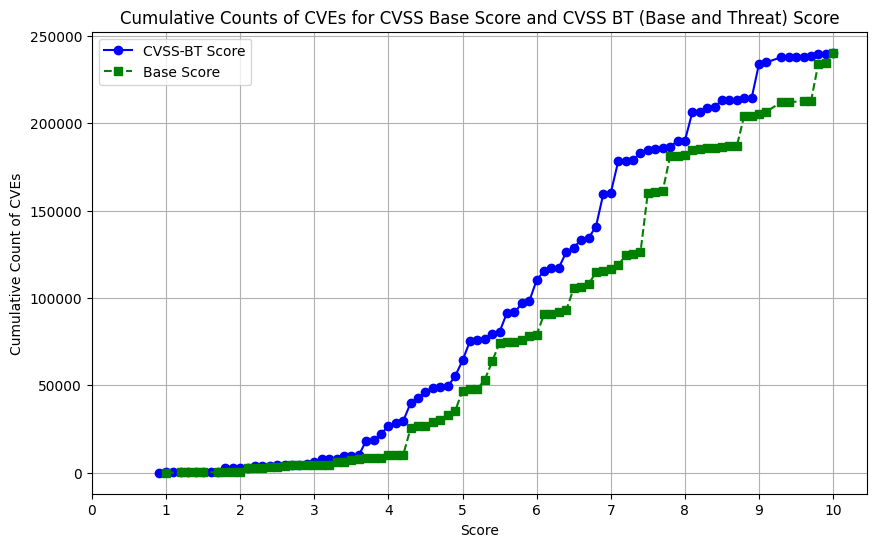

In [64]:
# Count CVEs above cvss-bt_score for all cvss-bt_score
cvss_bt_counts = df['cvss-bt_score'].value_counts().sort_index().cumsum()

# Count CVEs above base_score for all base_score
base_counts = df['base_score'].value_counts().sort_index().cumsum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(cvss_bt_counts.index, cvss_bt_counts.values, marker='o', linestyle='-', color='blue', label='CVSS-BT Score')
plt.plot(base_counts.index, base_counts.values, marker='s', linestyle='--', color='green', label='CVSS-B CVSS-B Base Score')
plt.xlabel('Score')
plt.ylabel('Cumulative Count of CVEs')
plt.title('Cumulative Counts of CVEs for CVSS Base Score and CVSS BT (Base and Threat) Score')
plt.xticks(range(11))
plt.legend()
plt.grid(True)
plt.show()

## Cumulative Count of CVEs starting at CVSS 10
This is the count of CVEs **at/above** a given CVSS score i.e. for a given CVSS score, how many CVEs **at/above** that score?

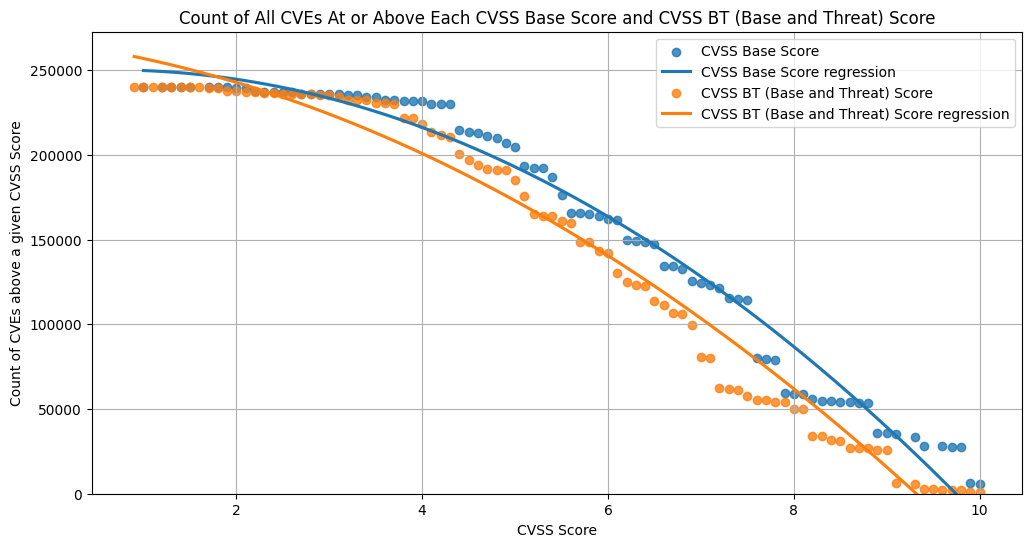

In [65]:
# Calculate the cumulative sum of counts above each 'BaseScore' value
base_score_counts = df['base_score'].value_counts().sort_index()
cumulative_counts = base_score_counts[::-1].cumsum()[::-1]  # Reverse the order to start from 0

# Calculate the cumulative sum of counts above each 'BaseScore' value
cvss_bt_score_counts = df['cvss-bt_score'].value_counts().sort_index()
cvss_bt_cumulative_counts = cvss_bt_score_counts[::-1].cumsum()[::-1]  # Reverse the order to start from 0

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.regplot(x=cumulative_counts.index, y=cumulative_counts.values, order=2, ci=None)
sns.regplot(x=cvss_bt_cumulative_counts.index, y=cvss_bt_cumulative_counts.values, order=2, ci=None)


plt.title('Count of All CVEs At or Above Each CVSS Base Score and CVSS BT (Base and Threat) Score')
plt.xlabel('CVSS Score')
plt.ylabel('Count of CVEs above a given CVSS Score')
plt.ylim(0)  # Set the x-axis limits from 0.1 to 1
plt.legend(['CVSS Base Score', 'CVSS Base Score regression', 'CVSS BT (Base and Threat) Score', 'CVSS BT (Base and Threat) Score regression'])
plt.grid()
plt.show()

## CVSS Ratings

In [86]:


# Define function to categorize scores
def categorize_score(score):
    if score >= 0.1 and score <= 3.9:
        return 'low'
    elif score >= 4.0 and score <= 6.9:
        return 'medium'
    elif score >= 7.0 and score <= 8.9:
        return 'high'
    elif score >= 9.0 and score <= 10.0:
        return 'critical'
    else:
        return 'invalid'

# Apply categorization to both base_score and cvss-bt_score
df['base_score_category'] = df['base_score'].apply(categorize_score)
df['cvss-bt_score_category'] = df['cvss-bt_score'].apply(categorize_score)

# Count the number of CVEs in each category
base_score_counts = df['base_score_category'].value_counts().reindex(['low', 'medium', 'high', 'critical'], fill_value=0)
cvss_bt_score_counts = df['cvss-bt_score_category'].value_counts().reindex(['low', 'medium', 'high', 'critical'], fill_value=0)

# Calculate percentages
base_score_perc = base_score_counts / base_score_counts.sum() * 100
cvss_bt_score_perc = cvss_bt_score_counts / cvss_bt_score_counts.sum() * 100

# Create traces for base score categories
trace_base_low = go.Bar(
    x=['CVSS-B Base Score'],
    y=[base_score_perc['low']],
    name='Low',
    marker=dict(color='green')
)
trace_base_medium = go.Bar(
    x=['CVSS-B Base Score'],
    y=[base_score_perc['medium']],
    name='Medium',
    marker=dict(color='orange')
)
trace_base_high = go.Bar(
    x=['CVSS-B Base Score'],
    y=[base_score_perc['high']],
    name='High',
    marker=dict(color='pink')
)
trace_base_critical = go.Bar(
    x=['CVSS-B Base Score'],
    y=[base_score_perc['critical']],
    name='Critical',
    marker=dict(color='red')
)

# Create traces for CVSS-BT score categories
trace_cvss_bt_low = go.Bar(
    x=['CVSS-BT Base Threat Score'],
    y=[cvss_bt_score_perc['low']],
    name='Low',
    marker=dict(color='green')
)
trace_cvss_bt_medium = go.Bar(
    x=['CVSS-BT Base Threat Score'],
    y=[cvss_bt_score_perc['medium']],
    name='Medium',
    marker=dict(color='orange')
)
trace_cvss_bt_high = go.Bar(
    x=['CVSS-BT Base Threat Score'],
    y=[cvss_bt_score_perc['high']],
    name='High',
    marker=dict(color='pink')
)
trace_cvss_bt_critical = go.Bar(
    x=['CVSS-BT Base Threat Score'],
    y=[cvss_bt_score_perc['critical']],
    name='Critical',
    marker=dict(color='red')
)

# Layout
layout = go.Layout(
    title='CVEs by CVSS-B Base and CVSS-BT Base Threat Score Ratings',
    xaxis=dict(title='CVSS Rating'),
    yaxis=dict(title='Percentage of CVEs'),
    barmode='stack',
    bargroupgap=0.1,
    bargap=0.2,
    height=500,
    width=600
)

# Create figure
fig = go.Figure(
    data=[trace_base_low, trace_base_medium, trace_base_high, trace_base_critical,
          trace_cvss_bt_low, trace_cvss_bt_medium, trace_cvss_bt_high, trace_cvss_bt_critical],
    layout=layout
)
# Show plot
fig.show()